# 🎓 Airline Price Prediction

# Data Understanding

## Dataset Columns Description

| Column Name        | Description |
|--------------------|-------------|
| Airline            | Name of the airline operating the flight |
| Date_of_Journey    | Date on which the journey takes place |
| Source             | City from which the flight departs |
| Destination        | City where the flight lands |
| Route              | Flight route including layover cities |
| Dep_Time           | Departure time of the flight |
| Arrival_Time       | Arrival time of the flight |
| Duration           | Total travel time of the journey |
| Total_Stops        | Number of stops during the flight |
| Additional_Info    | Additional details about the flight |
| Price              | Ticket price (target variable) |


In [90]:
import numpy as np
import pandas as pd
import plotly.express as px

In [91]:
df = pd.read_excel('Data_Train.xlsx')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [92]:
df.sample(1000).to_csv('Airline.csv',index=False)

# Data Exploration

In [93]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [94]:
# Check Summary statistics for numerical columns
df.describe().round(2)

,Price
count,10683.00
mean,9087.06
std,4611.36
min,1759.00
25%,5277.00
50%,8372.00
75%,12373.00
max,79512.00


In [95]:
# Check Summary statistics for Categorical columns
df.describe(include= ['object'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [96]:
# Check duplicates
df.duplicated().sum()

np.int64(220)

In [97]:
# Check Missing Values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [98]:
# Check Missing Values by percentage
df.isna().mean().round(4) * 100

Airline            0.00
Date_of_Journey    0.00
Source             0.00
Destination        0.00
Route              0.01
Dep_Time           0.00
Arrival_Time       0.00
Duration           0.00
Total_Stops        0.01
Additional_Info    0.00
Price              0.00
dtype: float64

# Data Cleaning

In [99]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.dropna(inplace=True)

In [102]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df['Source']=df['Source'].replace('New Delhi','Delhi')
df['Destination']=df['Destination'].replace('New Delhi','Delhi')
df['Total_Stops']=df['Total_Stops'].replace({'non-stop':0, '2 stops':2 , '1 stop':1 ,  '3 stops':3, '4 stops':4})

In [ ]:
df['Duration']
def duration(x):
    item=str(x).split(' ')
    d=[]
    for i in item:
        if "h" in i:
            d.append(int(i.replace('h',''))*60)
        elif "m" in i:
            d.append(int(i.replace('m','')))
    return np.round(sum(d)/60,2)
df['Duration']=df['Duration'].apply(duration)

0         2.83
1         7.42
2        19.00
3         5.42
4         4.75
         ...  
10458     2.50
10459     2.58
10460     3.00
10461     2.67
10462     8.33
Name: Duration, Length: 10462, dtype: float64

In [107]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1,No info,13302


### In depth check for Numerical Columns

### -to check Nan in the Additional_Info 

In [108]:
for col in df.select_dtypes(include='O'):
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print("*"*20)

Airline
12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
********************
Date_of_Journey
44
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
********************
Source
5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
********************
Destination
5
['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']
********************
Ro

In [109]:
num_cols = df.select_dtypes(include= 'number').columns
num_cols

Index(['Duration', 'Total_Stops', 'Price'], dtype='object')

In [110]:
for col in num_cols:

    px.histogram(data_frame= df, x= col, title= col).show()

In [111]:
df[df['Price']>20000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21.08,1,No info,22270
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20.25,1,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6.42,1,No info,36983
486,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,08:55,15:15,6.33,1,No info,26890
510,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,07:00,12:25,5.42,1,No info,26890
...,...,...,...,...,...,...,...,...,...,...,...
10232,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14.33,1,No info,31825
10248,Jet Airways,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 08 Mar,47.67,2,No info,20694
10302,Air India,01/03/2019,Banglore,Delhi,BLR → BOM → BHO → DEL,06:45,09:25 02 Mar,26.67,2,2 Long layover,26480
10348,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,14:05,09:00 02 Mar,18.92,1,No info,20800


In [112]:
df[df['Duration']>30]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
108,Air India,9/05/2019,Delhi,Cochin,DEL → JDH → BOM → COK,12:55,19:15 10 May,30.33,2,No info,11596
226,Jet Airways,3/03/2019,Delhi,Cochin,DEL → IDR → BOM → COK,05:25,18:50 04 Mar,37.42,2,No info,18799
344,Air India,9/04/2019,Delhi,Cochin,DEL → JDH → BOM → COK,12:55,19:15 10 Apr,30.33,2,No info,9968
470,Jet Airways,21/03/2019,Delhi,Cochin,DEL → UDR → BOM → COK,18:20,04:25 23 Mar,34.08,2,No info,13082
553,Air India,9/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,05:00,19:15 10 Mar,38.25,2,No info,10598
...,...,...,...,...,...,...,...,...,...,...,...
10129,Air India,15/05/2019,Kolkata,Banglore,CCU → BOM → HBX → BLR,09:25,17:20 16 May,31.92,2,No info,13616
10238,Air India,6/06/2019,Delhi,Cochin,DEL → JDH → BOM → COK,12:55,19:15 07 Jun,30.33,2,No info,12646
10248,Jet Airways,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 08 Mar,47.67,2,No info,20694
10342,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,12:30 02 May,30.67,2,No info,12723


In [113]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [114]:
df['Total_Stops'] = df['Total_Stops'].clip(upper=3)

In [115]:
df[df['Total_Stops']>=3]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
402,Air India,15/06/2019,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15,07:40 16 Jun,26.42,3,No info,10493
918,Air India,12/05/2019,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,12:00,23:15 13 May,35.25,3,No info,10991
1216,Air India,27/06/2019,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15,07:40 28 Jun,26.42,3,No info,11543
1661,Air India,01/03/2019,Banglore,Delhi,BLR → CCU → BBI → HYD → DEL,05:50,12:15 02 Mar,30.42,3,No info,12346
2160,Air India,18/05/2019,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15,19:15 19 May,38.00,3,No info,10703
2609,Air India,12/03/2019,Mumbai,Hyderabad,BOM → JDH → JAI → DEL → HYD,09:40,15:15 13 Mar,29.58,3,No info,18293
2619,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → GWL → IDR → BOM → COK,11:35,21:00,9.42,3,No info,21829
2701,Air India,9/03/2019,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15,19:15 10 Mar,38.00,3,No info,15586
2797,Air India,12/03/2019,Banglore,Delhi,BLR → BOM → IDR → GWL → DEL,17:25,18:05 13 Mar,24.67,3,No info,13387
2805,Air India,24/05/2019,Kolkata,Banglore,CCU → DEL → COK → TRV → BLR,10:00,10:30 25 May,24.50,3,No info,13007


#### In depth Check for Categorical Columns

In [116]:
cols_obj=df.select_dtypes(include='O').columns
cols_obj


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Additional_Info'],
      dtype='object')

In [117]:
for col in cols_obj:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('*'*10)
    print(df[col].value_counts())
    print("_"*100)

Airline
12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
**********
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
____________________________________________________________________________________________________
Date_of_Journey
44
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019

In [118]:
def status(x):
    if x in ['Vistara Premium economy' ,'Multiple carriers Premium economy' ]:
        return 'Premium'
    elif x in ['Jet Airways Business']:
        return 'Business'
    return 'economy'
df['status']=df['Airline'].apply(status)

In [119]:
df['Airline']=df['Airline'].replace({'Vistara Premium economy':'Vistara' ,'Multiple carriers Premium economy':'Multiple carriers','Jet Airways Business':'Jet Airways'})

In [120]:
df[df['Airline']=='Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,status
2859,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3.25,1,No info,4140,economy


In [121]:
df.drop(index=df[df['Airline']=='Trujet'].index ,inplace=True)

In [122]:
df.reset_index(inplace=True , drop=True)

In [123]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,status
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,0,No info,3897,economy
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2,No info,7662,economy
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2,No info,13882,economy
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1,No info,6218,economy
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1,No info,13302,economy
...,...,...,...,...,...,...,...,...,...,...,...,...
10456,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2.50,0,No info,4107,economy
10457,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2.58,0,No info,4145,economy
10458,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3.00,0,No info,7229,economy
10459,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2.67,0,No info,12648,economy


## Feature Engneering

In [ ]:
df['Many_Stops'] = (df['Total_Stops'] == 3).astype(int)

df['Additional_Info'].replace('No info',np.nan).isna().sum()

df.drop(columns=['Additional_Info'],inplace=True)

In [127]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,status,Many_Stops
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,0,3897,economy,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2,7662,economy,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2,13882,economy,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1,6218,economy,0
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1,13302,economy,0


In [128]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\3774653499.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\3774653499.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [129]:
def part_of_day(hour):
    if hour < 6:
        return 'Early_Morning'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

df['Dep_period'] = df['Dep_hour'].apply(part_of_day)


In [ ]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['Journey_weekday'] = pd.to_datetime(df['Date_of_Journey']).dt.dayofweek
df['Is_weekend'] = df['Journey_weekday'].apply(lambda x: 1 if x >= 5 else 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\2963049553.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\2963049553.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\2963049553.py:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [131]:
df['Is_long_flight'] = (df['Duration'] > 24).astype(int)


In [132]:
df.drop(columns=['Date_of_Journey', 'Dep_Time','Arrival_Time','Route'],inplace=True)

In [136]:
df.sample(1000).to_csv('Airline_2.csv',index=False)

# Data Analysis

In [134]:
import plotly.express as px

# Histogram to show distribution of exam scores
fig = px.histogram(
    df,
    x='Price',                  # Target variable
    nbins=50,                        # Number of bins
    title='Distribution of Exam Scores',
    color_discrete_sequence=['#636EFA']  # Blue color
)

fig.update_layout(
    xaxis_title='Exam Score',
    yaxis_title='Count'
)

fig.show()


In [140]:
px.bar(
    df["Airline"].value_counts().reset_index(),
    x="Airline",
    y="count",
    title="Number of Flights per Airline"
)


In [142]:
px.bar(
    df["Total_Stops"].value_counts().sort_index().reset_index(),
    x="Total_Stops",
    y="count",
    title="Distribution of Total Stops"
)


In [145]:
px.bar(
    df["Journey_weekday"].value_counts().sort_index().reset_index(),
    x="Journey_weekday",
    y="count",
    title="Flights by Day of Week"
)


## Bivariate Analysis

In [146]:
px.box(
    df,
    x="Airline",
    y="Price",
    title="Flight Price Distribution by Airline",
    labels={"Price": "Ticket Price (INR)"}
)


In [150]:
px.box(
    df,
    x="Journey_month",
    y="Price",
    title="Price Variation Across Months",
    labels={"Journey_month": "Month", "Price": "Ticket Price (INR)"}
)


In [151]:
px.box(
    df,
    x="Is_weekend",
    y="Price",
    title="Weekend vs Weekday Flight Prices",
    labels={"Is_weekend": "Is Weekend (1=Yes)", "Price": "Ticket Price (INR)"}
)


In [152]:
px.box(
    df,
    x="Dep_period",
    y="Price",
    title="Flight Prices by Departure Period",
    labels={"Dep_period": "Departure Period", "Price": "Ticket Price (INR)"}
)


In [153]:
route_price = (
    df.groupby(["Source", "Destination"])["Price"]
    .mean()
    .reset_index()
)

px.bar(
    route_price,
    x="Source",
    y="Price",
    color="Destination",
    title="Average Flight Price by Route"
)


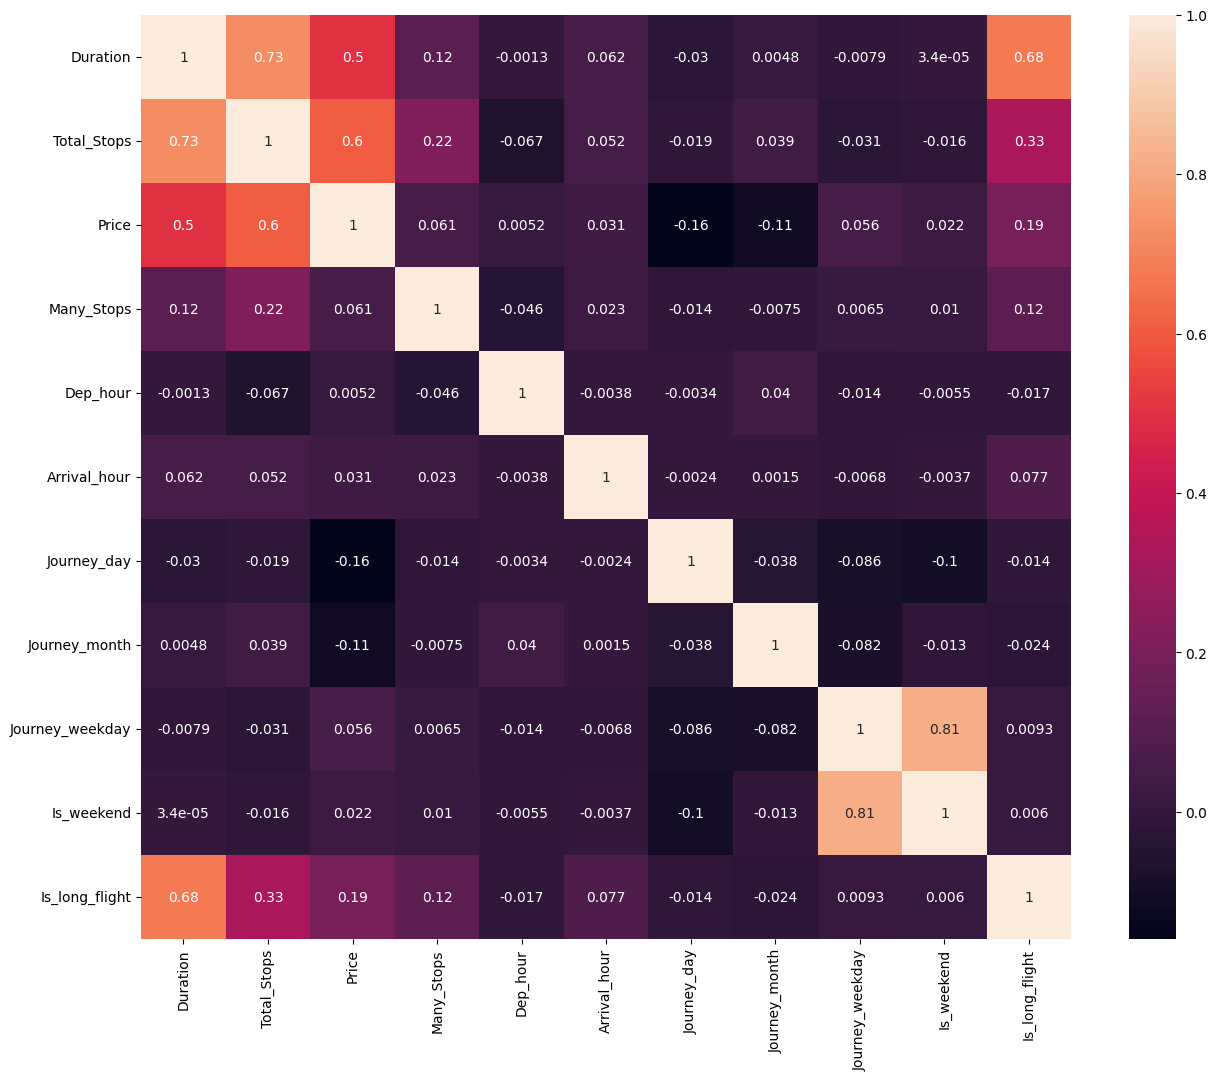

In [51]:
# Select numerical columns for correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = [
    'exam_score',
    'study_hours_per_day',
    'attendance_percentage',
    'sleep_hours',
    'time_management_score',
    'exam_anxiety_score',
    'study_efficiency'
]

# Compute correlation matrix
corr = df[df.select_dtypes(include='number').columns].corr()

# Plot heatmap
plt.figure(figsize=(15,12))
fig = sns.heatmap(corr ,annot=True)

plt.show()


### Which behavioral factors have the strongest impact on Price?

In [52]:
sd=['Duration', 'Total_Stops', 'Many_Stops', 'Dep_hour', 'Arrival_hour',
       'Journey_day', 'Journey_month', 'Journey_weekday', 'Is_weekend',
       'Is_long_flight','Price']

corr_df = (
    df[sd]
    .corr()['Price']
    .drop('Price')
    .reset_index()
    .rename(columns={'index': 'Feature', 'Price': 'Correlation'})
)

fig = px.bar(
    corr_df.sort_values('Correlation'),
    x='Correlation',
    y='Feature',
    orientation='h',
    title='Impact of Behavioral Factors on Price',
    color='Correlation',
    color_continuous_scale='RdBu'
)

fig.show()


### 1️⃣ Which airline offers the cheapest and the most expensive flights on average?

In [156]:
airline_price = (
    df.groupby("Airline")["Price"]
    .mean()
    .reset_index()
    .sort_values("Price")
)
airline_price

,Airline,Price
6,SpiceJet,4335.841718
0,Air Asia,5590.260188
3,IndiGo,5668.469897
2,GoAir,5861.056701
7,Vistara,7808.596674
1,Air India,9556.608028
5,Multiple carriers,10908.228288
4,Jet Airways,11674.724771


In [155]:
px.bar(
    airline_price,
    x="Airline",
    y="Price",
    title="Average Flight Price by Airline",
    labels={"Price": "Average Ticket Price (INR)"},
)


### 2️⃣ How does the number of stops affect flight ticket prices?

In [157]:
px.box(
    df,
    x="Total_Stops",
    y="Price",
    title="Flight Price vs Number of Stops",
    labels={
        "Total_Stops": "Number of Stops",
        "Price": "Ticket Price (INR)"
    }
)


3️⃣ Do flight prices vary by departure time period?

In [160]:
dep_price = (
    df.groupby("Dep_period")["Price"]
    .mean()
    .reset_index()
)
dep_price

,Dep_period,Price
0,Afternoon,9178.225215
1,Early_Morning,8696.149140
2,Morning,9093.728930
3,Night,8905.075694


In [159]:
px.bar(
    dep_price,
    x="Dep_period",
    y="Price",
    title="Average Flight Price by Departure Period",
    labels={"Price": "Average Ticket Price (INR)"}
)


### 4️⃣ Are weekend flights more expensive than weekday flights?

In [161]:
weekend_price = (
    df.groupby("Is_weekend")["Price"]
    .mean()
    .reset_index()
)

weekend_price["Is_weekend"] = weekend_price["Is_weekend"].map({
    0: "Weekday",
    1: "Weekend"
})


In [162]:
px.bar(
    weekend_price,
    x="Is_weekend",
    y="Price",
    title="Weekend vs Weekday Flight Prices",
    labels={"Price": "Average Ticket Price (INR)"}
)


### 5️⃣ How does flight duration influence ticket prices?

In [163]:
px.scatter(
    df,
    x="Duration",
    y="Price",
    trendline="ols",
    title="Flight Duration vs Ticket Price",
    labels={
        "Duration": "Flight Duration (Hours)",
        "Price": "Ticket Price (INR)"
    },
    opacity=0.6
)


In [54]:
# Save cleaned data

df.to_csv('cleaned_df.csv',index=False)

# Data Preprocessing

### Split Data into Input Features and Target Column

In [69]:
data=df.drop(columns=['Dep_hour'])

In [70]:
x = data.drop(['Price'], axis= 1)
y = data['Price']
y_log = np.log1p(y)

In [89]:
x.head()

,Airline,Source,Destination,Duration,Total_Stops,status,Many_Stops,Arrival_hour,Dep_period,Journey_day,Journey_month,Journey_weekday,Is_weekend,Is_long_flight
0,IndiGo,Banglore,Delhi,2.83,0,economy,0,1,Night,24,3,6,1,0
1,Air India,Kolkata,Banglore,7.42,2,economy,0,13,Early_Morning,1,5,2,0,0
2,Jet Airways,Delhi,Cochin,19.00,2,economy,0,4,Morning,9,6,6,1,0
3,IndiGo,Kolkata,Banglore,5.42,1,economy,0,23,Night,12,5,6,1,0
4,IndiGo,Banglore,Delhi,4.75,1,economy,0,21,Afternoon,1,3,4,0,0


## pipeline

In [ ]:
# Categorical (Nominal)
categorical_cols = [
    'Airline',
    'Source',
    'Destination',
    'Dep_period',
    'status'
]

# Binary (0 / 1)
binary_cols = [
    'Many_Stops',
    'Is_weekend',
    'Is_long_flight'
]

# Numeric (Ordinal / Continuous)
numeric_cols = [
    'Duration',
    'Total_Stops',
    'Journey_day'
]

# Cyclical
hour_cols = ['Arrival_hour']
month_cols = ['Journey_month']
weekday_cols = ['Journey_weekday']


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CyclicalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, period):
        self.period = period

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.astype(float)
        sin = np.sin(2 * np.pi * X / self.period)
        cos = np.cos(2 * np.pi * X / self.period)
        return np.hstack([sin, cos])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,RobustScaler
from sklearn.compose import ColumnTransformer

hour_pipe = Pipeline([
    ('cyc', CyclicalEncoder(period=24))
])

month_pipe = Pipeline([
    ('cyc', CyclicalEncoder(period=12))
])

weekday_pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipe = Pipeline([
    ('scaler', RobustScaler())
])

cat_pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

bin_pipe = Pipeline([
    ('passthrough', 'passthrough')
])



In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ('hour', hour_pipe, hour_cols),
        ('month', month_pipe, month_cols),
        ('weekday', weekday_pipe, weekday_cols),
        ('num', num_pipe, numeric_cols),
        ('bin', 'passthrough', binary_cols),
        ('cat', cat_pipe, categorical_cols)
    ],
    remainder='drop'
)


### Select Best Model

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

# قائمة النماذج
models = [
    ('Linear Regression', LinearRegression()),

    ('Ridge', Ridge(alpha=1.0, random_state=42)),

    ('Lasso', Lasso(alpha=0.1, random_state=42)),

    ('KNN Regressor', KNeighborsRegressor()),

    ('Decision Tree', DecisionTreeRegressor(max_depth=10, random_state=42)),

    ('Random Forest', RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)),

    ('XGB', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )),

    ('LGB', LGBMRegressor(
        objective='regression',
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    ))
]


for name, model in models:

    model_pipeline = Pipeline(steps=[('Preprocessing', preprocessor), ('Model', model)])

    # Scoring 
    scoring = {
        'R2': 'r2',
        'MAE': 'neg_mean_absolute_error',
        'MSE': 'neg_mean_squared_error'
    }

    cv = cross_validate(
        model_pipeline,
        x,
        y_log,
        scoring=scoring,
        cv=5,
        return_train_score=True,
        n_jobs=-1
    )

    print(name)
    print('Train R²:', round(cv['train_R2'].mean(), 3))
    print('Test  R²:', round(cv['test_R2'].mean(), 3))

    print('Train MAE:', round(-cv['train_MAE'].mean(), 3))
    print('Test  MAE:', round(-cv['test_MAE'].mean(), 3))

    import numpy as np
    # RMSE = sqrt(MSE)
    print('Train RMSE:', round(np.sqrt(-cv['train_MSE'].mean()), 3))
    print('Test  RMSE:', round(np.sqrt(-cv['test_MSE'].mean()), 3))

    print('-' * 80)


Linear Regression
Train R²: 0.735
Test  R²: 0.732
Train MAE: 0.203
Test  MAE: 0.203
Train RMSE: 0.265
Test  RMSE: 0.266
--------------------------------------------------------------------------------
Ridge
Train R²: 0.735
Test  R²: 0.732
Train MAE: 0.203
Test  MAE: 0.203
Train RMSE: 0.265
Test  RMSE: 0.266
--------------------------------------------------------------------------------
Lasso
Train R²: 0.394
Test  R²: 0.394
Train MAE: 0.324
Test  MAE: 0.324
Train RMSE: 0.401
Test  RMSE: 0.401
--------------------------------------------------------------------------------
KNN Regressor
Train R²: 0.857
Test  R²: 0.783
Train MAE: 0.141
Test  MAE: 0.175
Train RMSE: 0.194
Test  RMSE: 0.239
--------------------------------------------------------------------------------
Decision Tree
Train R²: 0.898
Test  R²: 0.835
Train MAE: 0.117
Test  MAE: 0.147
Train RMSE: 0.165
Test  RMSE: 0.209
--------------------------------------------------------------------------------
Random Forest
Train R²: 0.9

### Hyperparameter Tuning

- XGBRegressor

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

xgb = XGBRegressor(
    objective='reg:squarederror',  
    random_state=42,
    n_jobs=-1
)

# (Hyperparameters)
param_dist = {
    'Model__n_estimators': [200, 300, 500],
    'Model__max_depth': [3, 4, 6, 10, 12],
    'Model__learning_rate': [0.01, 0.05, 0.1],
    'Model__subsample': [0.7, 0.8, 1.0],
    'Model__colsample_bytree': [0.7, 0.8, 1.0],
    'Model__gamma': [0, 0.1, 0.3],
    'Model__reg_alpha': [0, 0.1, 0.5],
    'Model__reg_lambda': [1, 1.5, 2]
}

#  Pipeline
pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),  # preprocessing 
    ('Model', xgb)
])

# Randomized Search
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,  #  
    scoring='neg_root_mean_squared_error',  # RMSE 
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit 
search.fit(x, np.log1p(y))  #  log-transform


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Preprocessing',
                                              ColumnTransformer(transformers=[('hour',
                                                                               Pipeline(steps=[('cyc',
                                                                                                CyclicalEncoder(period=24))]),
                                                                               ['Arrival_hour']),
                                                                              ('month',
                                                                               Pipeline(steps=[('cyc',
                                                                                                CyclicalEncoder(period=12))]),
                                                                               ['Journey_month']),
                                                                              ('weekday',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Journey_we...
                   param_distributions={'Model__colsample_bytree': [0.7, 0.8,
                                                                    1.0],
                                        'Model__gamma': [0, 0.1, 0.3],
                                        'Model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'Model__max_depth': [3, 4, 6, 10, 12],
                                        'Model__n_estimators': [200, 300, 500],
                                        'Model__reg_alpha': [0, 0.1, 0.5],
                                        'Model__reg_lambda': [1, 1.5, 2],
                                        'Model__subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [164]:
search.best_params_

{'Model__subsample': 1.0,
 'Model__reg_lambda': 1.5,
 'Model__reg_alpha': 0.1,
 'Model__n_estimators': 300,
 'Model__max_depth': 6,
 'Model__learning_rate': 0.1,
 'Model__gamma': 0,
 'Model__colsample_bytree': 0.8}

In [78]:
best_model = search.best_estimator_

# Predictions (log scale)
y_pred_log = best_model.predict(x)

# 
y_pred = np.expm1(y_pred_log)
y_true = y.values

# Metrics
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Final Model Performance on Full Data:")
print("RMSE:", round(rmse, 2))
print("MAE :", round(mae, 2))
print("R²  :", round(r2, 3))


Final Model Performance on Full Data:
RMSE: 1400.24
MAE : 914.61
R²  : 0.908


c:\Users\hp\anaconda3\envs\apps\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning:

This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.

c:\Users\hp\anaconda3\envs\apps\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning:

This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.



## save model


In [87]:
import joblib

joblib.dump(best_model, 'flight_price_model.pkl')

['flight_price_model.pkl']

- Test the Model

In [88]:
GD_model = joblib.load('flight_price_model.pkl')

GD_model.predict(x.head(1))

c:\Users\hp\anaconda3\envs\apps\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning:

This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.

c:\Users\hp\anaconda3\envs\apps\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning:

This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.



array([8.570205], dtype=float32)

In [86]:
x.head().columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'status',
       'Many_Stops', 'Arrival_hour', 'Dep_period', 'Journey_day',
       'Journey_month', 'Journey_weekday', 'Is_weekend', 'Is_long_flight'],
      dtype='object')

In [169]:
ddf= pd.read_excel('Data_Train.xlsx')
ddf.to_csv('Data_Train.csv',index=False)

In [166]:

"""
Perform initial cleaning and feature engineering:
- Handle missing values
- Normalize text fields
- Fix address info
- Build 'combined' feature (cuisines + rest_type)
- Convert target 'rate' to binary classification
"""


ddf.drop_duplicates(inplace=True,ignore_index=True)
ddf=ddf.dropna()

ddf['Source']=ddf['Source'].replace('New Delhi','Delhi')
ddf['Destination']=ddf['Destination'].replace('New Delhi','Delhi')
ddf['Total_Stops']=ddf['Total_Stops'].replace({'non-stop':0, '2 stops':2 , '1 stop':1 ,  '3 stops':3, '4 stops':4})
ddf['Duration']
def duration(x):
    item=str(x).split(' ')
    d=[]
    for i in item:
        if "h" in i:
            d.append(int(i.replace('h',''))*60)
        elif "m" in i:
            d.append(int(i.replace('m','')))
    return np.round(sum(d)/60,2)
ddf['Duration']=ddf['Duration'].apply(duration)

ddf['Total_Stops'] = ddf['Total_Stops'].clip(upper=3)

def status(x):
    if x in ['Vistara Premium economy' ,'Multiple carriers Premium economy' ]:
        return 'Premium'
    elif x in ['Jet Airways Business']:
        return 'Business'
    return 'economy'
ddf['status']=ddf['Airline'].apply(status)

ddf['Airline']=ddf['Airline'].replace({'Vistara Premium economy':'Vistara' ,'Multiple carriers Premium economy':'Multiple carriers','Jet Airways Business':'Jet Airways'})

ddf.drop(index=ddf[ddf['Airline']=='Trujet'].index ,inplace=True)

ddf.reset_index(inplace=True , drop=True)
ddf['Many_Stops'] = (ddf['Total_Stops'] == 3).astype(int)

ddf['Additional_Info'].replace('No info',np.nan).isna().sum()

ddf.drop(columns=['Additional_Info'],inplace=True)     

ddf['Dep_hour']=pd.to_datetime(ddf['Dep_Time']).dt.hour
ddf['Arrival_hour']=pd.to_datetime(ddf['Arrival_Time']).dt.hour

def part_of_day(hour):
    if hour < 6:
        return 'Early_Morning'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

ddf['Dep_period'] = ddf['Dep_hour'].apply(part_of_day)

ddf['Journey_day'] = pd.to_datetime(ddf['Date_of_Journey']).dt.day
ddf['Journey_month'] = pd.to_datetime(ddf['Date_of_Journey']).dt.month
ddf['Journey_weekday'] = pd.to_datetime(ddf['Date_of_Journey']).dt.dayofweek
ddf['Is_weekend'] = ddf['Journey_weekday'].apply(lambda x: 1 if x >= 5 else 0)    

ddf['Is_long_flight'] = (ddf['Duration'] > 24).astype(int)

ddf.drop(columns=['Date_of_Journey', 'Dep_Time','Arrival_Time','Route'],inplace=True)

ddf.drop(columns=['Dep_hour'],inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_11404\1881474157.py:16: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\1881474157.py:50: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\1881474157.py:51: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\hp\AppData\Local\Temp\ipykernel_11404\1881474157.py:65: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was speci

In [168]:
ddf.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'status', 'Many_Stops', 'Arrival_hour', 'Dep_period', 'Journey_day',
       'Journey_month', 'Journey_weekday', 'Is_weekend', 'Is_long_flight'],
      dtype='object')